In [1]:
!pip install keras


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
#keras là framwork chuyên làm CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist  #bộ dữ liệu chữ viết tay, dữ liệu đã được để dưới dạng ma trận thay vì image

In [4]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)  #Chia ra 50000 - train, 10000 - valid
print(X_test.shape)   #10000 - test
print(X_train[1])


11490434/11490434 [==============================] - 0s 0us/step
(50000, 28, 28)
(10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 

In [5]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)  #Đưa ma trận 2 chiều thành tensor 3D
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


In [6]:
# 4. One hot encoding label (Y)
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])


Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
#Định nghĩa model
model = Sequential()  #Mạng nơ ron tuần tự, theo lớp

In [8]:
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))
# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
# Thêm Max pooling layer  - stride = 2, size window = 2*2 -> giảm kích thước 1 nửa
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())
# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))
# Output layer với 10 node và dùng softmax function để chuyển sang xác suất.
model.add(Dense(10, activation='softmax'))

In [9]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [10]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
batch_size=32, epochs=10, verbose=1)  # 10 epochs

Epoch 1/10
1563/1563 [==============================] - 12s 5ms/step - loss: 0.2751 - accuracy: 0.9201 - val_loss: 0.0720 - val_accuracy: 0.9810
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0634 - accuracy: 0.9817 - val_loss: 0.0659 - val_accuracy: 0.9820
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0388 - accuracy: 0.9888 - val_loss: 0.0482 - val_accuracy: 0.9860
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0267 - accuracy: 0.9922 - val_loss: 0.0463 - val_accuracy: 0.9868
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0177 - accuracy: 0.9952 - val_loss: 0.0477 - val_accuracy: 0.9866
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0118 - accuracy: 0.9965 - val_loss: 0.0419 - val_accuracy: 0.9880
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0082 - accuracy: 0.9978 - val_loss: 0.0437 - val_accuracy

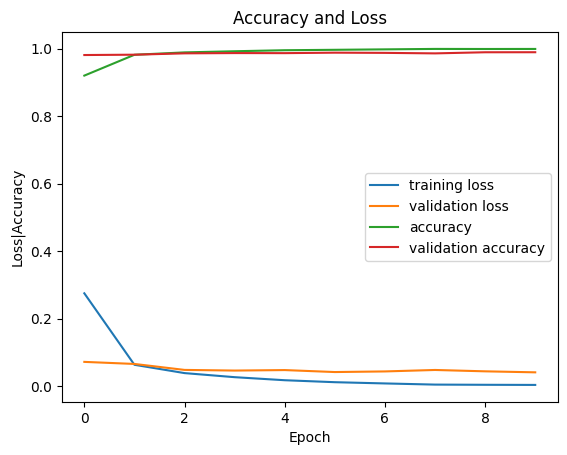

In [13]:
# 8. Vẽ đồ thị loss, accuracy của training set và validation set
fig = plt.figure()
numOfEpoch = 10 #10 vòng lặp
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

[0.03574525564908981, 0.9889000058174133]
1/1 [==============================] - 0s 59ms/step
Giá trị dự đoán:  1


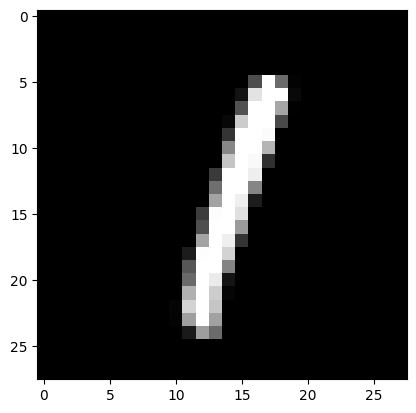

In [15]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
# 10. Dự đoán ảnh
plt.imshow(X_test[5].reshape(28,28), cmap='gray')
y_predict = model.predict(X_test[5].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))

In [17]:
model.save('/content/drive/MyDrive/Colab Notebooks/Identify_numberText.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
